# Industrial-scale penicillin simulation - Data analysis

This project uses data from http://www.industrialpenicillinsimulation.com/. The data was generated using an advanced mathematical simulation of a 100,000 litre penicillin fermentation system referenced as IndPenSim. As they say: 

    'IndPenSim is the first simulation to include a realistic simulated Raman spectroscopy device for the purpose 
    of developing, evaluating and implementation of advanced and innovative control solutions applicable to 
    biotechnology facilities.'
This data contains 100 batches with all available process and Raman spectroscopy measurements. The 100 batches are controlled using different control strategies and different batch lengths representing a typical Biopharmaceutical manufacturing facility:

        Batches 1-30: Controlled by recipe driven approach
        Batches 31-60: Controlled by operators
        Batches 61:90: Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy
        Batches 91:100: Contain faults resulting in process deviations.

In [1]:
import pandas as pd
import numpy as np

In [2]:
%%capture
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
data_total = pd.read_csv(r"C:\Users\klime\Downloads\100_Batches_IndPenSim\Mendeley_data\100_Batches_IndPenSim_V3.csv")

In [5]:
data_total #all available data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


In [6]:
data_total.shape

(113935, 2239)

In [7]:
data_sum = pd.read_csv(r"C:\Users\klime\Downloads\100_Batches_IndPenSim\Mendeley_data\100_Batches_IndPenSim_Statistics.csv")

In [8]:
data_sum.head() #summary of data

,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
0,1,1066400.0,1720000.0,2786400.0,0
1,2,985910.0,1340100.0,2326000.0,0
2,3,1416100.0,1259200.0,2675300.0,0
3,4,815700.0,1071000.0,1886700.0,0
4,5,1128500.0,2434400.0,3562900.0,0


In [9]:
data_sum.shape

(100, 5)

We have looked at data and there is need to assign type of process controll according to Batch ref. For this purpose there is function process():

In [10]:
def process(row):
    if row['Batch ref'] <31:
        val = 'Recipes driven'
    elif row['Batch ref'] < 61 and row['Batch ref']>30:
        val = 'Operator driven'
    elif row['Batch ref'] < 91 and row['Batch ref']>60:
        val = 'Advanced'
    else:
        val = 'Process deviations'
    return val

In [11]:
data_sum['Process control'] = data_sum.apply(process, axis = 1)

In [12]:
data_sum.rename(columns={'Penicllin_yield_total (kg)':'Penicillin_yield_total (kg)'}, inplace=True)

In [13]:
data_sum.head()

,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicillin_yield_total (kg),Fault ref(0-NoFault 1-Fault),Process control
0,1,1066400.0,1720000.0,2786400.0,0,Recipes driven
1,2,985910.0,1340100.0,2326000.0,0,Recipes driven
2,3,1416100.0,1259200.0,2675300.0,0,Recipes driven
3,4,815700.0,1071000.0,1886700.0,0,Recipes driven
4,5,1128500.0,2434400.0,3562900.0,0,Recipes driven


Splitting the data into process measurement data and Raman spectroscopy data.

In [14]:
variable_raman_data = np.split(data_total, [data_total.columns.get_loc("2400")], axis=1)
variable_data = variable_raman_data[0]
variable_data.describe()
### Reable Batch ID's correctly
variable_data = variable_data.rename(columns={'2-PAT control(PAT_ref:PAT ref)':'Batch_ref','Batch reference(Batch_ref:Batch ref)':'2-PAT control(PAT_ref:PAT ref)'})
raman_spectra = variable_raman_data[1]
batch_ref_df = variable_data[['Batch_ref']]
raman_spectra_batch_id = pd.concat([batch_ref_df, raman_spectra], axis=1)
variable_data.shape
variable_data.head(3)

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch_ref,2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
0,0.2,30.0,100.0,8.0,0.0,30.118,9.8335,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.4,30.0,100.0,8.0,0.0,51.221,18.1550,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.6,30.0,100.0,8.0,0.0,54.302,9.5982,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [15]:
variable_data = variable_data.rename(columns={'Time (h)':'Time'})

In [16]:
variable_list = variable_data.columns

Text(0, 0.5, 'Penicillin concentration(P:g/L)')

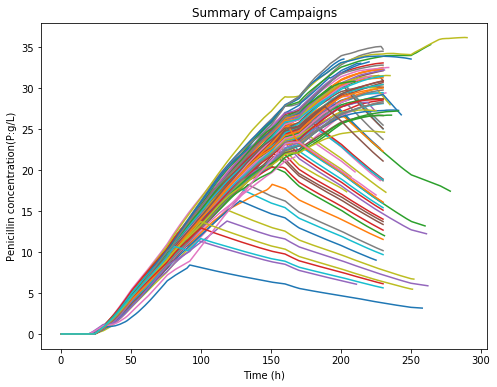

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
bp = variable_data.groupby('Batch_ref').plot(x = 'Time', y = 'Penicillin concentration(P:g/L)',   ax=ax, legend = False, )
ax.set_title('Summary of Campaigns')
ax.set_xlabel('Time (h)')
ax.set_ylabel('Penicillin concentration(P:g/L)')

Dependence of Penicilin concentrations on time in individual batches. It is confusing and there is no value in this graph. The data need to be clean up first.

I am defining function process2() (because it is similar as function process) which match individual batches with numerical value based on type of process controll.

In [18]:
def process2(row):
    if row['Batch_ref'] <31:
        val = '1'
    elif row['Batch_ref'] < 61 and row['Batch_ref']>30:
        val = '2'
    elif row['Batch_ref'] < 91 and row['Batch_ref']>60:
        val = '3'
    else:
        val = '4'
    return val

In [19]:
variable_data['Process control'] = variable_data.apply(process2, axis = 1)

And here comes interesting part. I am defining function MakeChart() which would compress that 100 batches into just 4, one for each type of process controll.

In [20]:
def MakeChart(variable):
    selected = variable_data[['Time',variable,'Process control']]    #Selecting variables needed for chart
    time_series_list = selected.values.tolist()                          #Transforming from dataframe to list
    recipe=[]                                                            #Sublists with types of Process control
    operators=[]
    advanced=[]
    deviations=[]
    i=0
    while i<len(time_series_list):                                       #Sorting to sublists based on Process control
        if time_series_list[i][2]=='1':
            recipe.append(time_series_list[i])
        elif time_series_list[i][2]=='2':
            operators.append(time_series_list[i])
        elif time_series_list[i][2]=='3':
            advanced.append(time_series_list[i])
        else:
            deviations.append(time_series_list[i])
        i +=1
    
    df_recipe = pd.DataFrame(recipe)                                     #From sublists to subdataframes
    df_operators = pd.DataFrame(operators)
    df_advanced = pd.DataFrame(advanced)
    df_deviations = pd.DataFrame(deviations)
    del df_recipe[2]                                                     #Cleaning subdataframes
    del df_operators[2]
    del df_advanced[2]
    del df_deviations[2]
    recipe_avg = df_recipe.groupby(0).mean()                             #Averaging values
    recipe_avg.rename(columns={1:'Recipes driven'}, inplace=True)
    operators_avg = df_operators.groupby(0).mean()
    operators_avg.rename(columns={1:'operators driven'}, inplace=True)
    advanced_avg = df_advanced.groupby(0).mean()
    advanced_avg.rename(columns={1:'Advanced solution'}, inplace=True)
    deviations_avg = df_deviations.groupby(0).mean()
    deviations_avg.rename(columns={1:'Process deviations'}, inplace=True)
    dff = recipe_avg[['Recipes driven']]                                 #From subdataframes to one dataframe
    dff['Operators driven'] = operators_avg
    dff['Advanced solution'] = advanced_avg
    dff['Process deviations'] = deviations_avg
    df = dff.head(1205)                                                   
    df['Time'] = df.index
    df = df.reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(8,6))                                #Making chart
    jk=df.plot(x= 'Time', y = ['Recipes driven', 'Operators driven', 'Advanced solution', 'Process deviations'], ax=ax, legend=True)
    ax.set_title(variable+'/ Time(h)')
    ax.set_ylabel(variable)
    ax.set_xlabel('Time (h)')

C:\Users\klime\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


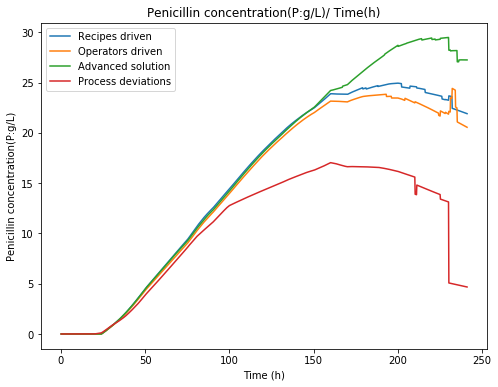

In [21]:
MakeChart('Penicillin concentration(P:g/L)')

Yes, that´s clearer now. We can see that advanced process controll have highest yield of Penicillin. 

C:\Users\klime\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


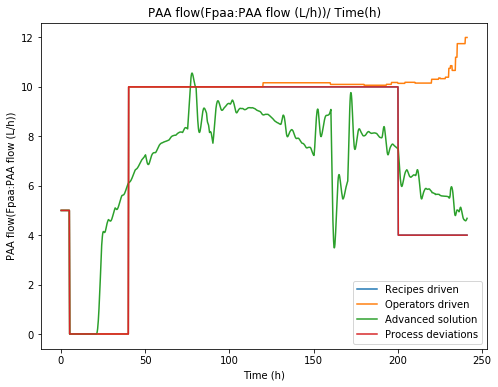

In [22]:
MakeChart('PAA flow(Fpaa:PAA flow (L/h))')

Advanced solution uses precise dosing of phenylacetic acid (PAA) based on actual need. 

Question is:
Has Advanced solution significantly better yield than other types of process control?

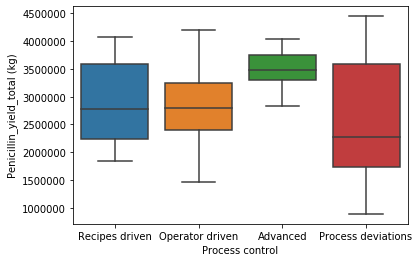

In [23]:
sns.boxplot(x = 'Process control', y = 'Penicillin_yield_total (kg)', data = data_sum)


We can see from the Boxplot that Advanced solution has highest value of median Penicillin yield. But performs significantly better than other?

In [24]:
import researchpy as rp
rp.summary_cont(data_sum['Penicillin_yield_total (kg)']. groupby(data_sum['Process control']))

,N,Mean,SD,SE,95% Conf.,Interval
Process control,,,,,,
Advanced,30,3.484283e+06,3.079801e+05,56229.217480,3.372190e+06,3.596377e+06
Operator driven,30,2.833113e+06,6.799292e+05,124137.527529,2.585644e+06,3.080582e+06
Process deviations,10,2.600203e+06,1.199611e+06,379350.210474,1.816457e+06,3.383949e+06
Recipes driven,30,2.912750e+06,7.675764e+05,140139.644456,2.633381e+06,3.192119e+06


In [25]:
import scipy.stats as stats
stats.f_oneway(data_sum['Penicillin_yield_total (kg)'][data_sum['Process control']=='Advanced'],
               data_sum['Penicillin_yield_total (kg)'][data_sum['Process control']=='Operator driven'],
               data_sum['Penicillin_yield_total (kg)'][data_sum['Process control']=='Recipes driven'],
               data_sum['Penicillin_yield_total (kg)'][data_sum['Process control']=='Process deviations'])

F_onewayResult(statistic=6.659558242061837, pvalue=0.00039204294070446273)

One way ANOVA test tells us that p value is less than 0.05 therefore we can reject null hypothesis that all types of process control have same impact on yield of Penicillin. And we can say that Advanced process control performs significantly better than other.

# Model development 

Let's try develop regression model for predicting Penicilling concentration. Firstly we need some preparation of data.

In [26]:
par = variable_data
par = par[['Time','Batch_ref','Aeration rate(Fg:L/h)', 'Sugar feed rate(Fs:L/h)', 'Base flow rate(Fb:L/h)', 
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)',
 'PAA flow(Fpaa:PAA flow (L/h))',
 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
 'Oil flow(Foil:L/hr)',
 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Oxygen in percent in off-gas(O2:O2  (%))',
 'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
 'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
 'Carbon evolution rate(CER:g/h)',
 'Viscosity(Viscosity_offline:centPoise)', 'Process control']]
par.tail()


,Time,Batch_ref,Aeration rate(Fg:L/h),Sugar feed rate(Fs:L/h),Base flow rate(Fb:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Temperature(T:K),Generated heat(Q:kJ),...,PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Viscosity(Viscosity_offline:centPoise),Process control
113930,229.2,100.0,65.0,80.0,12.9000,72.708,13.385,5.6567,297.89,215.09,...,NaN,23.0,NaN,0.32342,0.19996,NaN,NaN,0.99550,NaN,4
113931,229.4,100.0,65.0,80.0,10.0470,72.774,13.388,5.6490,298.07,278.39,...,NaN,23.0,NaN,0.31662,0.20002,NaN,NaN,0.99522,NaN,4
113932,229.6,100.0,65.0,80.0,7.3609,72.842,13.390,5.6414,297.98,246.05,...,NaN,23.0,NaN,0.31168,0.20006,NaN,NaN,0.99494,NaN,4
113933,229.8,100.0,65.0,80.0,6.2794,72.910,13.390,5.6339,297.88,212.63,...,NaN,23.0,NaN,0.31178,0.20006,NaN,NaN,0.99466,NaN,4
113934,230.0,100.0,65.0,80.0,7.3055,72.979,13.407,5.6263,297.98,246.79,...,8254.5,23.0,3755.6,0.30106,0.20015,5.6567,16.863,0.99438,117.93,4


In [27]:
missing_data = par.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Time
False    113935
Name: Time, dtype: int64

Batch_ref
False    113935
Name: Batch_ref, dtype: int64

Aeration rate(Fg:L/h)
False    113935
Name: Aeration rate(Fg:L/h), dtype: int64

Sugar feed rate(Fs:L/h)
False    113935
Name: Sugar feed rate(Fs:L/h), dtype: int64

Base flow rate(Fb:L/h)
False    113935
Name: Base flow rate(Fb:L/h), dtype: int64

Substrate concentration(S:g/L)
False    113935
Name: Substrate concentration(S:g/L), dtype: int64

Dissolved oxygen concentration(DO2:mg/L)
False    113935
Name: Dissolved oxygen concentration(DO2:mg/L), dtype: int64

Penicillin concentration(P:g/L)
False    113935
Name: Penicillin concentration(P:g/L), dtype: int64

Temperature(T:K)
False    113935
Name: Temperature(T:K), dtype: int64

Generated heat(Q:kJ)
False    113935
Name: Generated heat(Q:kJ), dtype: int64

carbon dioxide percent in off-gas(CO2outgas:%)
False    113935
Name: carbon dioxide percent in off-gas(CO2outgas:%), dtype: int64

PAA flow(Fpaa:PAA flow (L/h))
False    113935
N

In [28]:
del par['Viscosity(Viscosity_offline:centPoise)']
del par['Offline Biomass concentratio(X_offline:X(g L^{-1}))']
del par['Offline Penicillin concentration(P_offline:P(g L^{-1}))']
del par['NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))']
del par['PAA concentration offline(PAA_offline:PAA (g L^{-1}))']


Creating pivot table and correlation matrix:

In [29]:
piv = par.pivot(index='Time', columns = 'Batch_ref')

In [30]:
piv.corr()

Aeration rate(Fg:L/h)            \
Batch_ref                                                1.0       2.0     
                               Batch_ref                                   
Aeration rate(Fg:L/h)          1.0                    1.000000  1.000000   
                               2.0                    1.000000  1.000000   
                               3.0                    1.000000  1.000000   
                               4.0                    1.000000  1.000000   
                               5.0                    1.000000  1.000000   
...                                                        ...       ...   
Carbon evolution rate(CER:g/h) 96.0                   0.928778  0.928346   
                               97.0                   0.928081  0.928081   
                               98.0                   0.918111  0.918106   
                               99.0                   0.800006  0.797569   
                               100.0                  0.831078  0.829602   

                                                                        \
Batch_ref                                    3.0       4.0       5.0     
                               Batch_ref                                 
Aeration rate(Fg:L/h)          1.0        1.000000  1.000000  1.000000   
                               2.0        1.000000  1.000000  1.000000   
                               3.0        1.000000  1.000000  1.000000   
                               4.0        1.000000  1.000000  1.000000   
                               5.0        1.000000  1.000000  1.000000   
...                                            ...       ...       ...   
Carbon evolution rate(CER:g/h) 96.0       0.928346  0.928346  0.939449   
                               97.0       0.928081  0.928081  0.932085   
                               98.0       0.918106  0.918106  0.929449   
                               99.0       0.777114  0.797569  0.861390   
                               100.0      0.829602  0.829602  0.876269   

                                                                        \
Batch_ref                                    6.0       7.0       8.0     
                               Batch_ref                                 
Aeration rate(Fg:L/h)          1.0        1.000000  1.000000  1.000000   
                               2.0        1.000000  1.000000  1.000000   
                               3.0        1.000000  1.000000  1.000000   
                               4.0        1.000000  1.000000  1.000000   
                               5.0        1.000000  1.000000  1.000000   
...                                            ...       ...       ...   
Carbon evolution rate(CER:g/h) 96.0       0.928346  0.928346  0.928346   
                               97.0       0.928081  0.928081  0.928081   
                               98.0       0.918106  0.918106  0.918106   
                               99.0       0.797569  0.795870  0.797569   
                               100.0      0.829602  0.829602  0.829602   

                                                              ...  \
Batch_ref                                    9.0       10.0   ...   
                               Batch_ref                      ...   
Aeration rate(Fg:L/h)          1.0        1.000000  1.000000  ...   
                               2.0        1.000000  1.000000  ...   
                               3.0        1.000000  1.000000  ...   
                               4.0        1.000000  1.000000  ...   
                               5.0        1.000000  1.000000  ...   
...                                            ...       ...  ...   
Carbon evolution rate(CER:g/h) 96.0       0.928346  0.928346  ...   
                               97.0       0.928081  0.928081  ...   
                               98.0       0.918106  0.918106  ...   
                               99.0       0.777114  0.797569  ...   
     

In [31]:
from scipy import stats

Identifying parameters correlated with Penicillin concentration. If p-value is less than 0.001 we can say there is strong evidence that the correlation is statistically significant. 

In [32]:
pearson_coef, p_value = stats.pearsonr(par['Aeration rate(Fg:L/h)'], par['Penicillin concentration(P:g/L)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7113451891959506  with a P-value of P = 0.0


In [33]:
pearson_coef, p_value = stats.pearsonr(par['carbon dioxide percent in off-gas(CO2outgas:%)'], par['Penicillin concentration(P:g/L)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6189008333419701  with a P-value of P = 0.0


In [34]:
pearson_coef, p_value = stats.pearsonr(par['Oil flow(Foil:L/hr)'], par['Penicillin concentration(P:g/L)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)



The Pearson Correlation Coefficient is -0.7520671248383757  with a P-value of P = 0.0


In [35]:
pearson_coef, p_value = stats.pearsonr(par['Dissolved oxygen concentration(DO2:mg/L)'], par['Penicillin concentration(P:g/L)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.3295678092930453  with a P-value of P = 0.0


In [36]:
pearson_coef, p_value = stats.pearsonr(par['Sugar feed rate(Fs:L/h)'], par['Penicillin concentration(P:g/L)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4697406906075524  with a P-value of P = 0.0


Setting up Multiple Linear Regression model:

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
Z = par[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']]
lm.fit(Z, par['Penicillin concentration(P:g/L)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lm.intercept_

907.0878386633913

In [40]:
lm.coef_

array([ 0.19831016,  4.3265132 , -0.98558915, -1.55380329, -2.90286346,
       -0.01704311])

Linear function we get:
Penicillin concentration = 907.087 + 0.198*Aeration rate +4.327*carbon dioxide percent in off-gas - ).0.986*Oil Flow - 1.55*Dissolved oxygen concentration - 2.903*Temperature - 0.017*Sugar Feed Rate

In [41]:
import seaborn as sns
%matplotlib inline

In [42]:
Y_hat = lm.predict(Z)

In [44]:
# fit the model 
lm.fit(Z, par['Penicillin concentration(P:g/L)'])
# Find the R^2
lm.score(Z, par['Penicillin concentration(P:g/L)'])

0.7430168816149273

In [45]:
Y_predict_multifit = lm.predict(Z)

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(par['Penicillin concentration(P:g/L)'], Y_predict_multifit)

25.352094552183765

R^2 of the model is 74% and mean squared error equals 25.35. There is still room for improvement.

In [50]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\klime\anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Linear model evaluation:

In [51]:
y_data=par['Penicillin concentration(P:g/L)']

In [52]:
x_data=par.drop('Penicillin concentration(P:g/L)',axis=1)

In [53]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 17091
number of training samples: 96844


In [54]:
lr=LinearRegression()
lr.fit(x_train[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's Calculate the R^2 on the test data:

In [55]:
lr.score(x_test[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']], y_test)

0.7434210766193005

And on the train data:

In [56]:
lr.score(x_train[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']], y_train)

0.7429333721587776

Test and train data give us similar values of R^2. Therefore we can assume that model is not underfitted or overfitted. 

In [58]:
yhat_train=lr.predict(x_train[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']])
yhat_train[0:5]

array([ 4.91992603, 15.54119513,  9.32780816, 23.35495682, 19.51682698])

In [59]:
yhat_test=lr.predict(x_test[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']])
yhat_test[0:5]

array([ 3.50306619, 23.30373048,  2.09017531, 15.7684404 ,  2.31650163])

In [60]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Penicillin concentration(P:g/L)')
    plt.ylabel('Proportion of Batches')

    plt.show()
    plt.close()

Let's examine the distribution of the predicted values of the training and testing data.

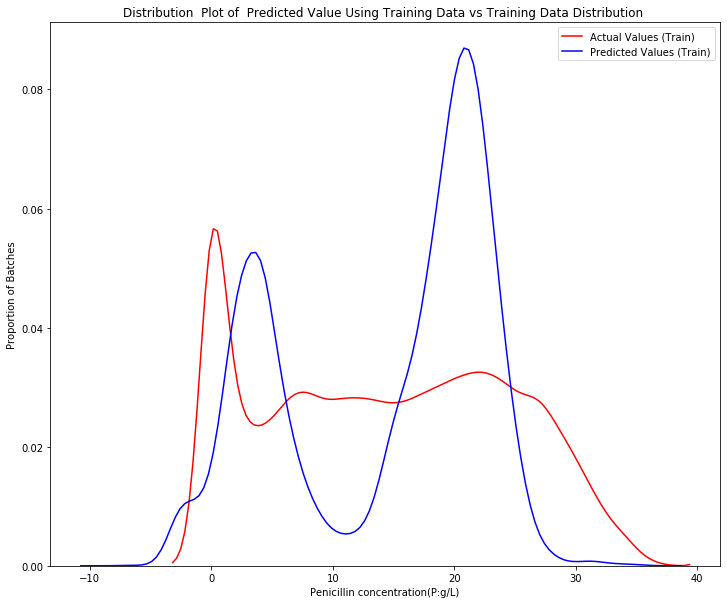

In [61]:
Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution '
DistributionPlot(y_train,yhat_train,"Actual Values (Train)","Predicted Values (Train)",Title)

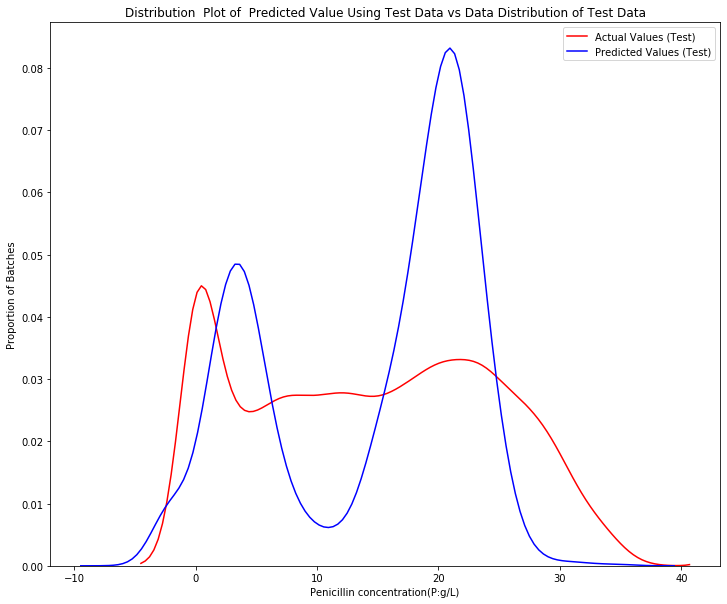

In [62]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Using test data plot fit the data similarly like using train data. Which is consistent with similar R^2 values. But perfomance isn´t good enough.

But maybe polynomial regression would have done better...

In [63]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)
x_train_pr=pr.fit_transform(x_train[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']])
x_test_pr=pr.fit_transform(x_test[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']])

In [64]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
yhat1=poly.predict(x_test_pr )
yhat1[0:5]

array([ 1.06426279, 20.43865938,  3.13567508, 16.08671711,  0.74749685])

Let's take the first five predicted values and compare it to the actual targets.

In [66]:
print("Predicted values:", yhat1[0:4])
print("True values:",y_test[0:4].values)

Predicted values: [ 1.06426279 20.43865938  3.13567508 16.08671711]
True values: [ 0.67228 15.256    3.1103  21.159  ]


R^2 of the training data:

In [67]:
poly.score(x_train_pr, y_train)

0.9141881165560073

R^2 of the test data:

In [68]:
poly.score(x_test_pr, y_test)

0.8953629144087957

We can see that polynomial regression model fits data better. Let´s examine impact order of polynom on R^2.

Text(3, 0.75, 'Maximum R^2 ')

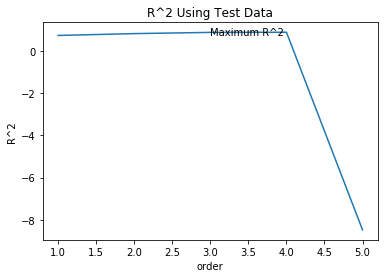

In [69]:
Rsqu_test=[]

order=[1,2,3,4,5]
for n in order:
    pr=PolynomialFeatures(degree=n)
    
    x_train_pr=pr.fit_transform(x_train[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']])
    
    x_test_pr=pr.fit_transform(x_test[['Aeration rate(Fg:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Sugar feed rate(Fs:L/h)']])    
    
    lr.fit(x_train_pr,y_train)
    
    Rsqu_test.append(lr.score(x_test_pr,y_test))

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

The best performance is with 4th order of polynom. 

We can deduce from these result that polynomial regression model performs better for this dataset. Using 4th order polynom we accomplished R^2 about 90%.